<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('homeprices.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [4]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [9]:
X=df.iloc[:,0:1]

In [13]:
y=df[['price']]

In [14]:
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [10]:
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [15]:
import matplotlib.pyplot as plt


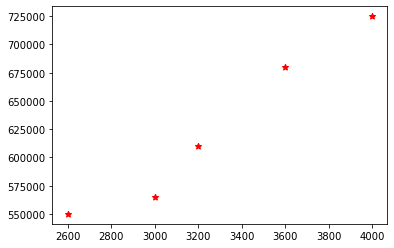

In [16]:
plt.scatter(X,y,marker='*',color='red')


In [62]:
X = df[['area']]

In [63]:
X.shape

(5, 1)

In [64]:
df.area.shape

(5,)

In [65]:
y = df[['price']]

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [21]:
reg.fit(X,y)

LinearRegression()

In [22]:
reg.coef_


array([[135.78767123]])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.09, normalize=True)

ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_train)
pred

array([725391.85196703, 666925.05053646, 608458.24910589, 579224.84839061])

In [23]:
reg.fit(X,y)

LinearRegression()

In [24]:
reg.coef_

array([[135.78767123]])

In [25]:
reg.intercept_

array([180616.43835616])

In [120]:
reg.predict (X_train)

array([1068041.09589041, 1139172.94520548,  712381.84931507,
        427854.45205479,  356722.60273973,  498986.30136986,
        641250.        , 1210304.79452055,  783513.69863014,
        925777.39726027])

In [77]:
X_vaildate = pd.read_csv('areas.csv')

In [78]:
reg.predict(X_vaildate)

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [79]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


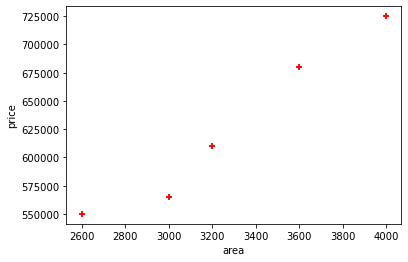

In [81]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.scatter(df.area,df.price,color='red',marker='+')

In [82]:
new_df = df.drop('price',axis=1)
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [83]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [84]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [85]:
reg.predict([[3300]])


array([628715.75342466])

In [86]:
reg.coef_

array([135.78767123])

In [87]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [88]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [89]:
y_pred = reg.predict([[3000]])

In [90]:
y_pred

array([587979.45205479])

In [91]:
y_actual = 565000

In [92]:
import numpy as np
mse = np.sum((y_pred - y_actual)**2)
m=3
rmse = np.sqrt(mse/m)

In [93]:
mse

528055216.7386005

In [94]:
rmse

13267.19282966572

In [95]:
# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)

# R2 score
r2_score = 1 - (ssr/sst)

<ipython-input-95-00fb901a85d4>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r2_score = 1 - (ssr/sst)


In [96]:
ssr

528055216.7386005

In [97]:
sst

0.0

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [29]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [30]:
p = reg.predict(area_df)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [31]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [32]:
area_df.to_csv("prediction.csv")

In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('predicted.csv')

In [35]:
df

,Unnamed: 0,0
0,0,3.164041e+05
1,1,3.842979e+05
2,2,4.929281e+05
3,3,6.613048e+05
4,4,7.400616e+05
5,5,7.998082e+05
6,6,9.260908e+05
7,7,6.504418e+05
8,8,8.256079e+05
9,9,4.929281e+05


In [36]:
df.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [37]:
df.isnull().sum()

Unnamed: 0    0
0             0
dtype: int64

In [47]:
X=df[['Unnamed: 0']]

In [48]:
y=df['0']

In [49]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [50]:
reg.fit(X,y)

LinearRegression()

In [51]:
reg.predict([[14]])

array([1352568.49315068])

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [53]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)


In [54]:
ridgeReg

Ridge(alpha=0.05, normalize=True)

In [58]:
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_train)

In [59]:
pred

array([ 784583.11849881,  572247.90633996,  855361.52255177,
        501469.50228701,  713804.71444586, 1138475.13876357,
       1067696.73471062,  926139.92660472,  996918.33065767,
        359912.69418111])

In [60]:
ridgeReg.predict([[14]])

array([1350810.35092242])